In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np
from glob import glob
from os.path import join 
import os 
from scikits.bootstrap import ci
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multitest import fdrcorrection

sns.set(style="whitegrid", context='paper', color_codes=False)
from plotResults import *

### 1. Plot results

#### 1.1 conf-corrs within one data subset

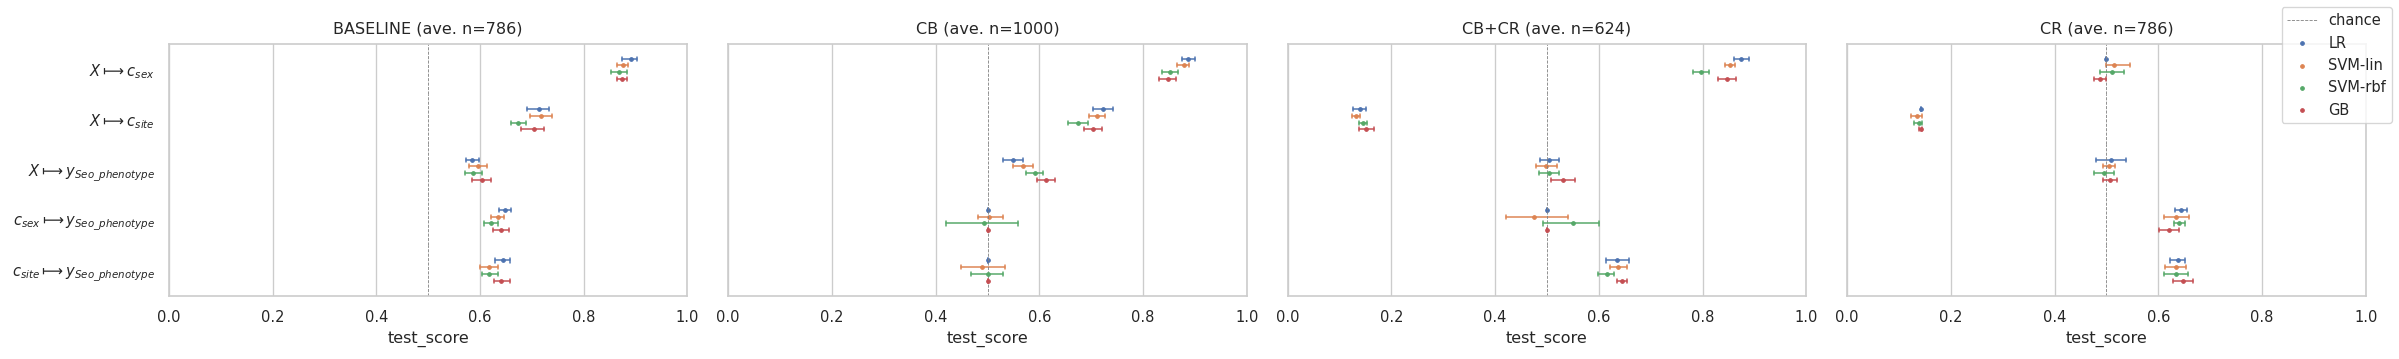

In [9]:
df = pd.read_csv(sorted(glob(f"results/conf_ctrl/*/run.csv"))[-1])  #audit-combos*audit-c*22
plot_result(df, x="test_score", no_confs=False)#, input_type='sMRI (22yrs)')
plt.show()

In [ ]:
df = pd.read_csv(glob(f"results/rsfmri-fu2-binge-gml3u6-n674/20210505-1253/run.csv")[-1])  #audit-combos*audit-c*22
plot_result(df, x="test_score", no_confs=False, input_type='fMRI (19yrs)')
plt.show()

In [ ]:
# inp = "fsstats"
# for tp in ["BL", "FU2", "FU3"]: 
#     df = pd.read_csv(glob(f"results/ESPAD19b*{inp}*{tp}*/*p1000/run.csv")[-1])
#     plot_result(df, x="test_score", conf_ctrl=["baseline", "cb", "cr"])
#     plt.suptitle(" X=({} at {}) --> y=(ESPAD19b growth curve)".format(inp, tp))
#     plt.tight_layout()
#     plt.show()

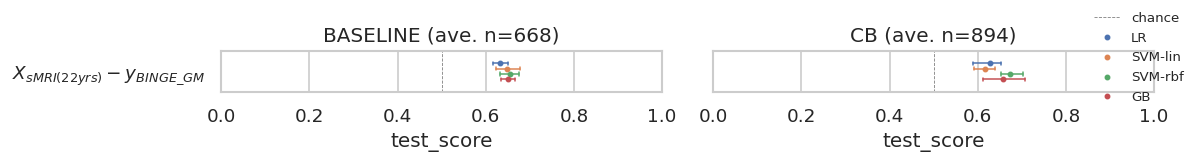

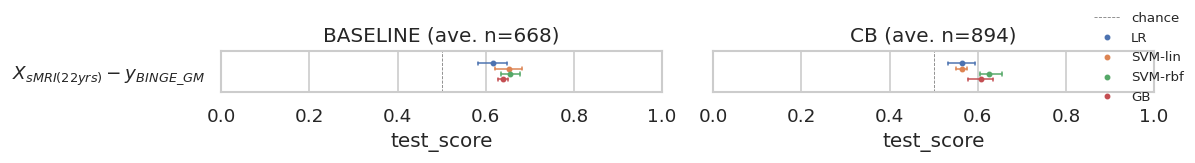

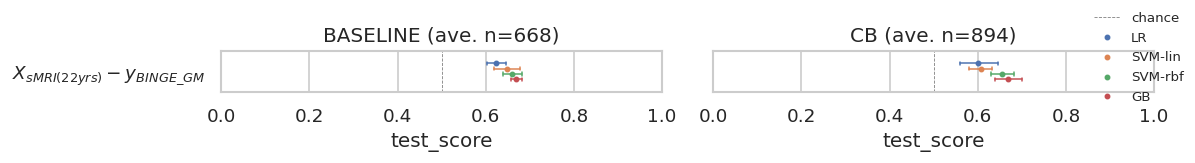

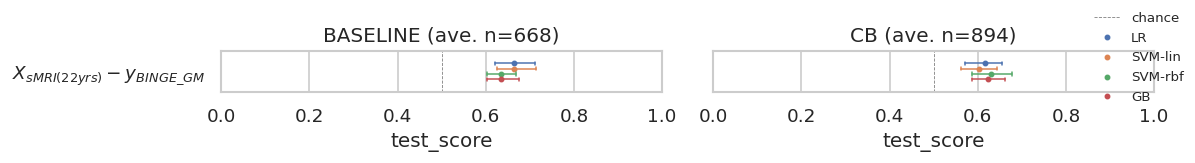

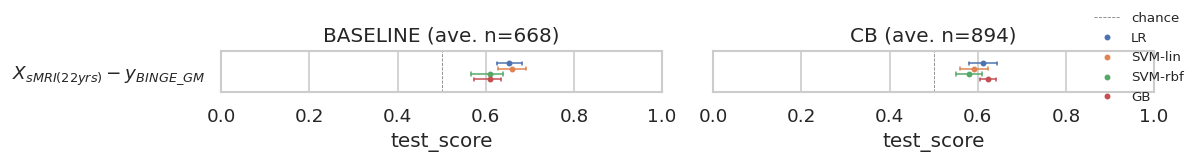

In [10]:
for df in [*[pd.read_csv(f) for f in glob(f"results/fsstats-thick*/*/run.csv")],    
    *[pd.read_csv(f) for f in glob(f"results/fsstats-volum*/*/run.csv")],     
    *[pd.read_csv(f) for f in glob(f"results/fsstats-area*/*/run.csv")],     
    *[pd.read_csv(f) for f in glob(f"results/fsstats-all-fu3-binge-gml2u6-n668.h5/*/run.csv")]]:

    plot_result(df, input_type='sMRI (22yrs)',
                conf_ctrl=["baseline","cb"], no_confs=True, 
                sorty_by='test_score', join=True) #'n_samples', 'test_score'

#### 1.2 Visualize p-value distributions

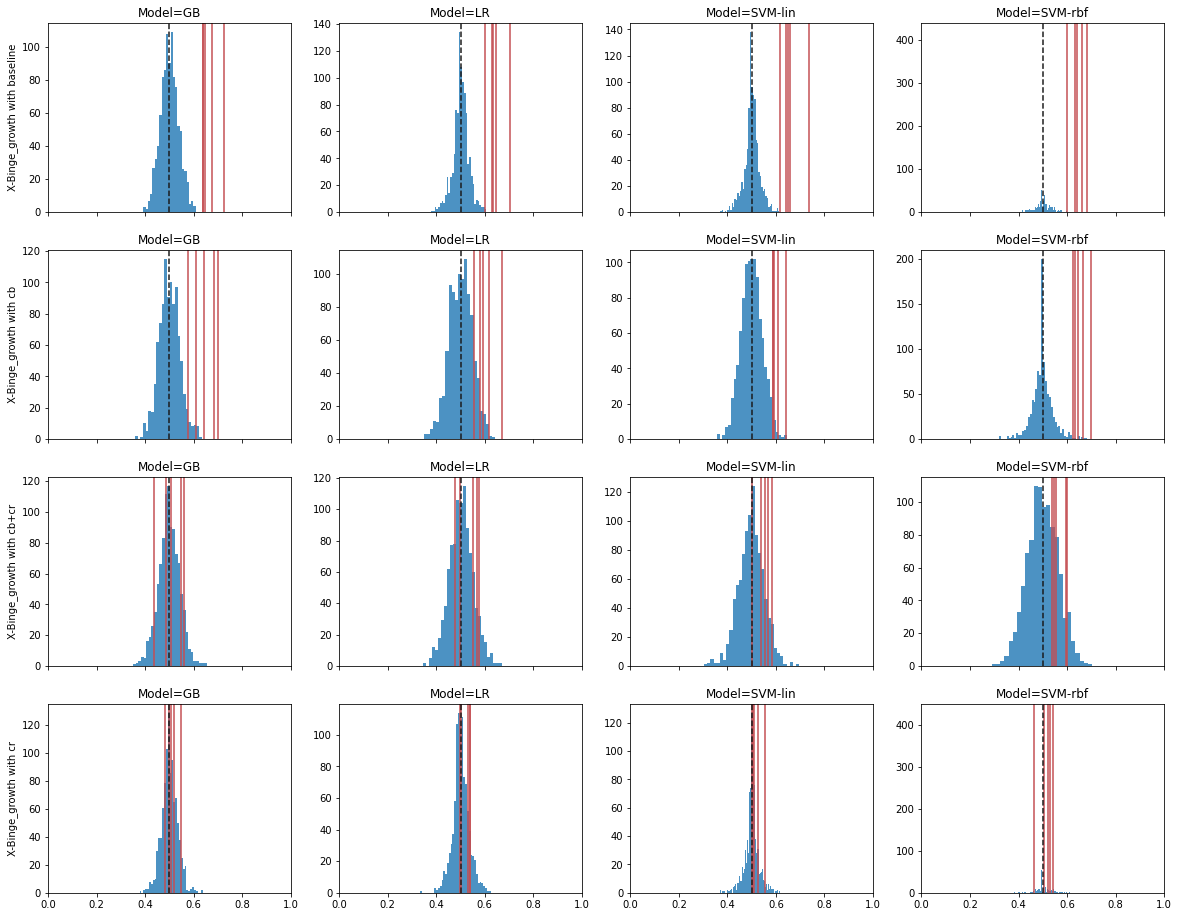

In [21]:
# test / visualize
inp, tp = "stats", "FU3"
df = pd.read_csv(sorted(glob(f"results/fsstats-all-fu2-binge-*/*/run.csv"))[-1])
df = calc_p_values(df, viz=True)
# df['p_value'].plot.hist()

#### 1.3 Across different data subsets (sample selection bias)
Note: These results are not really comparable because they have different (a) sample sizes and (b) label groupings. <br>
This comparison is nevertheless done here for just easy visualization but one must not draw any strong conclusions from them.

In [40]:
# glob(f"results/*gm-combos*espad*/*/run.csv")

In [41]:
# ! rm -rvf results/gm-combos-espad-gm-fine-cluster-binge-gm-fine-2-6-n668

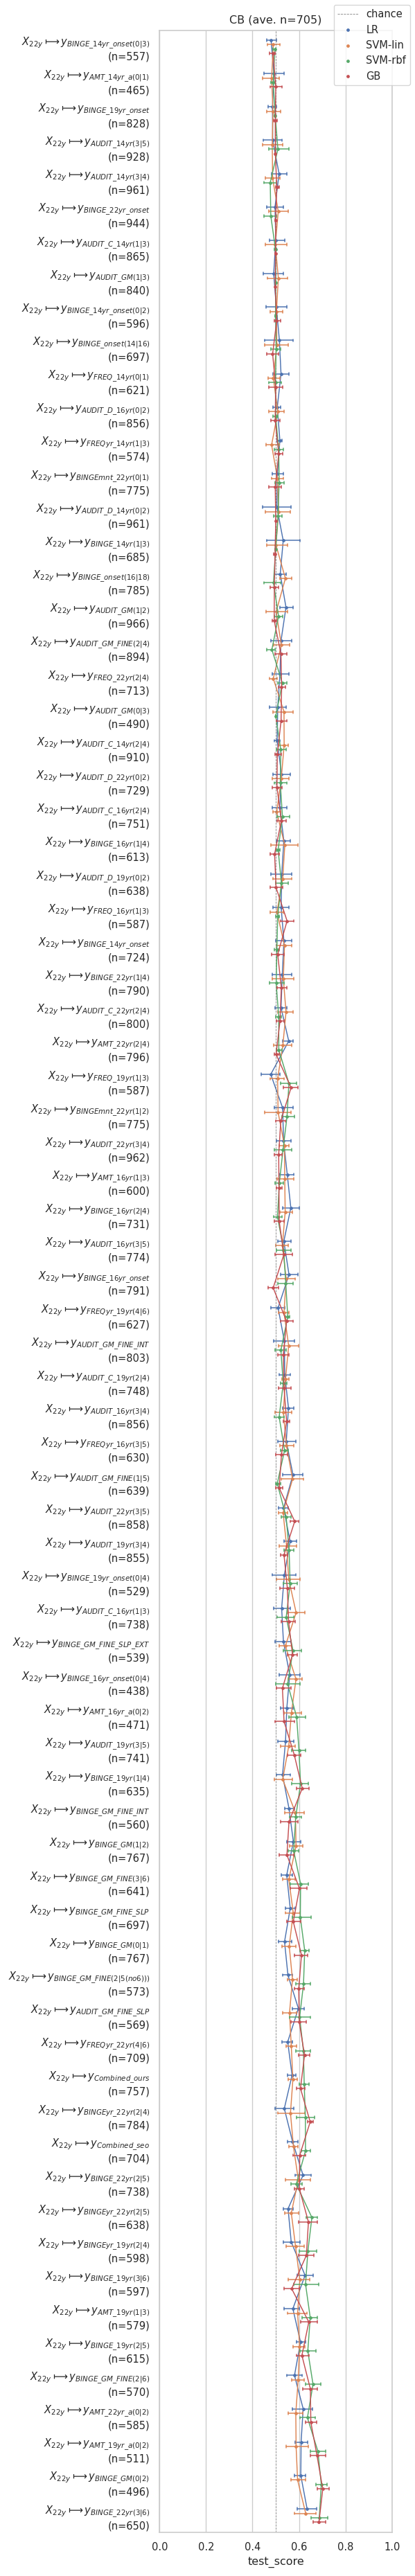

In [12]:
dfs = [
    *[pd.read_csv(f) for f in glob(f"results/audit-combos*/*/run.csv")],
    *[pd.read_csv(f) for f in glob(f"results/gm-combos*audit*/*/run.csv")], 
    *[pd.read_csv(f) for f in glob(f"results/gm-combos*espad*/*/run.csv")], 
    *[pd.read_csv(f) for f in glob(f"results/freq-combos*/*/run.csv")], 
    *[pd.read_csv(f) for f in glob(f"results/amt-combos*/*/run.csv")], 
    *[pd.read_csv(f) for f in glob(f"results/binge-combos*/*/run.csv")],
    *[pd.read_csv(f) for f in glob(f"results/newlbls*-phenotype*/*/run.csv")],
    *[pd.read_csv(f) for f in glob(f"results/newlbls*-our-*/*/run.csv")],  
    *[pd.read_csv(f) for f in glob(f"results/combo-combos*/*/run.csv")],  
      ]
    
plot_result(dfs, input_type='22y',
#             conf_ctrl=["baseline","cb"], 
            no_confs=True, 
            sorty_by='test_score', join=True) #'n_samples', 'test_score'
# plt.savefig("results/lbls_comparison_full.pdf")
plt.show()

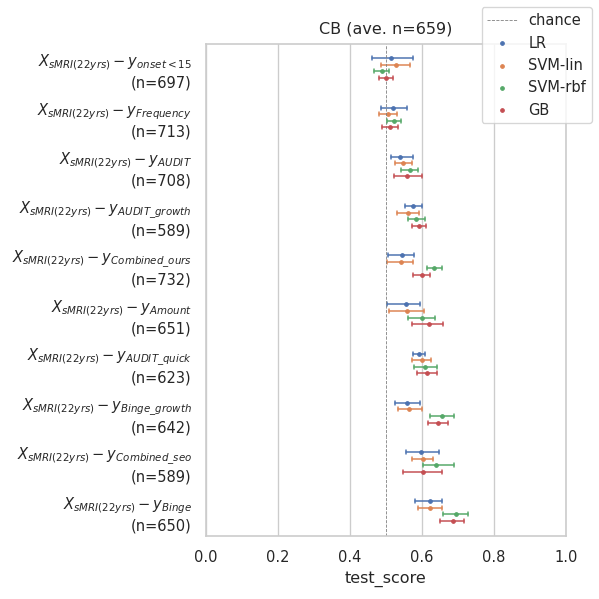

In [270]:
dfs = [pd.read_csv(f) for f in glob(f"results/newlbls-fu3*/*/run.csv")]
    
plot_result(dfs, input_type='sMRI (22yrs)', no_confs=True, 
            sorty_by='test_score', join=False) #'n_samples', 'test_score'
plt.show()

#### 1.4 Across different input modalities/ timepoints
Note: These results are not really comparable because they have different (a) sample sizes and (b) label groupings. <br>
This comparison is nevertheless done here for just easy visualization but one must not draw any strong conclusions from them.

All 3 timepoints


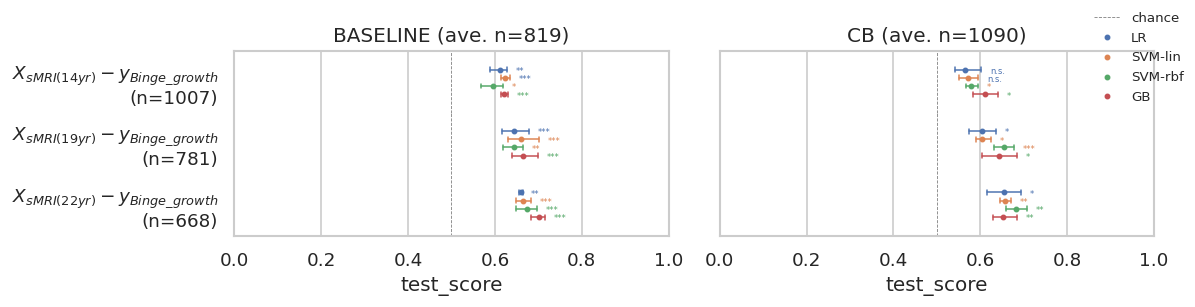

In [42]:
print("All 3 timepoints")
dfs = []
input_types = []
tp_map = {"bl":"14yr", "fu1":"16yr", "fu2":"19yr", "fu3":"22yr"}

for f in glob(f"results/*binge-growth*/*/run.csv"):
    dfs.extend([pd.read_csv(f)])
    # determine the input type for folder name
    typ, _, tp = f.split("/")[-3].replace("-z2","").split("-")[:3]
    if ("MNInlT1w" in typ) or ("fsstats" in typ):
        typ = "sMRI" 
    elif ("dti" in typ):
        typ = "DTI"
    input_type = "{} ({})".format(typ, tp_map[tp.lower()])
#     print(f, input_type)
    input_types.extend([input_type])
    
plot_result(dfs, input_type=input_types, 
            conf_ctrl=["baseline","cb"], 
            no_confs=True, 
            sorty_by='test_score', join=False) #'n_samples', 'test_score'

# plt.gcf().savefig("../figures/results_long.pdf", format='pdf')

Seo at al.'s Phenotype:


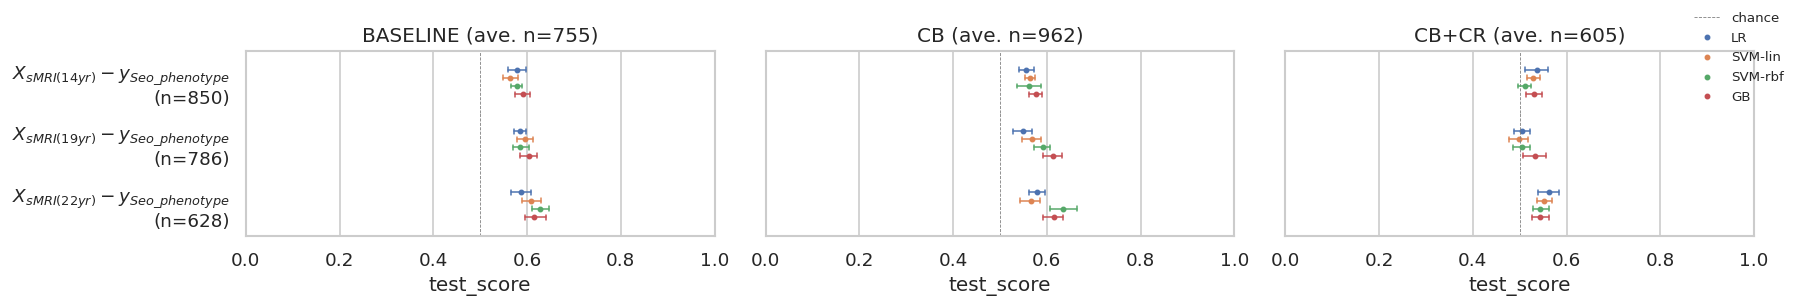

In [40]:
print("Seo at al.'s Phenotype:")
dfs = []
input_types = []
tp_map = {"bl":"14yr", "fu1":"16yr", "fu2":"19yr", "fu3":"22yr"}

for f in glob(f"results/*phenotype*/*/run.csv"):
    dfs.extend([pd.read_csv(f)])
    # determine the input type for folder name
    typ, _, tp = f.split("/")[-3].replace("-z2","").split("-")[:3]
    if ("MNInlT1w" in typ) or ("fsstats" in typ):
        typ = "sMRI" 
    elif ("dti" in typ):
        typ = "DTI"
    input_type = "{} ({})".format(typ, tp_map[tp.lower()])
#     print(f, input_type)
    input_types.extend([input_type])
    
plot_result(dfs, input_type=input_types, 
            conf_ctrl=["baseline","cb", "cb+cr"], no_confs=True, 
            sorty_by='test_score', join=False) #'n_samples', 'test_score'

In [ ]:
print("DTI modality:")
dfs=[]
input_types=[]
runtimes=[]
for fil in ["bl*z2*/*f1000", "bl*z2*/*all", "fu2*z2*/*f1000", "fu2*z2*/*all", "fu2-b*/*f1000", "fu2-b*/*all"]:
    f = glob(f"results/*dti*{fil}/run.csv")
    df = pd.read_csv(f[0])
#     print(f)
    # determine the input type for folder name
    typ = "DTI"
    tp = "{}-{}".format(*fil.split("*/*"))
    input_type = "{} ({})".format(typ, tp)
    dfs.extend([df])
    input_types.extend([input_type])
    runtimes.extend([df.runtime.mean()//60])
    
# plot runtime
plt.bar(np.arange(len(input_types)), runtimes, tick_label=input_types)
plt.xticks(rotation=90)
plt.ylabel("runtime (mins)")
plt.show()

plot_result(dfs, input_type=input_types, 
            x="test_score", no_confs=True, conf_ctrl=["baseline", "cb", "cr"],
            sorty_by='test_score', join=False)
plt.show()

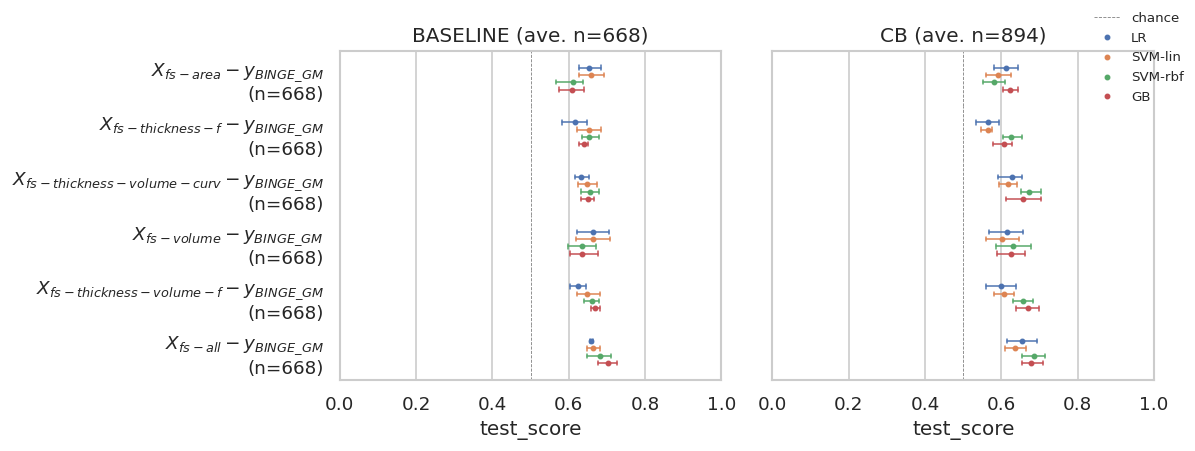

In [25]:
print("Freesurfer-stats features subsets:")

dfs=[]
input_types=[]

for fil in ["all*gml2u6-n668", "area", "volume", "thickness-f", "thickness-volume-f", "thickness-volume-curv"]:
    f = glob(f"results/fsstats-{fil}*/*/run.csv")
#     print(f)
    df = pd.read_csv(f[0])
    # determine the input type for folder name
    typ = "fs"
    subtyp = "{}".format(fil.split("*")[0])
    input_type = "{}-{}".format(typ, subtyp)
    dfs.extend([df])
    input_types.extend([input_type])
    

plot_result(dfs, input_type=input_types, 
            x="test_score", no_confs=True, conf_ctrl=["baseline", "cb"],
            sorty_by='test_score', join=False)
plt.show()

In [3]:
glob(f"results/combo-combos*/*/run.csv")

['results/combo-combos-combol0u1-binge-gm-slp-binge-lt-binge-22yr-audit-q1-audit-q-n829/20210512-0943/run.csv',
 'results/combo-combos-combol0u2-binge-gm-slp-binge-l-n610/20210512-1017/run.csv',
 'results/combo-combos-combol0u2-binge-gm-slp-binge-lt-binge-22y-n668/20210512-1032/run.csv',
 'results/combo-combos-combol0u2-binge-gm-slp-audit-gm-slp-binge-lt-binge-22yr-audit-q1-audit-q-n602/20210512-1003/run.csv',
 'results/combo-combos-combol0u1-binge-gm-slp-audit-gm-slp-binge-lt-binge-22yr-binge-gm-int-audit-q1-audit-q2-audit-gm-in-n829/20210512-0924/run.csv',
 'results/combo-combos-combol0u2-binge-gm-slp-binge-lt-binge-22yr-binge-gm-int-audit-q1-audit-q-n549/20210512-1048/run.csv']

Custom combo types:


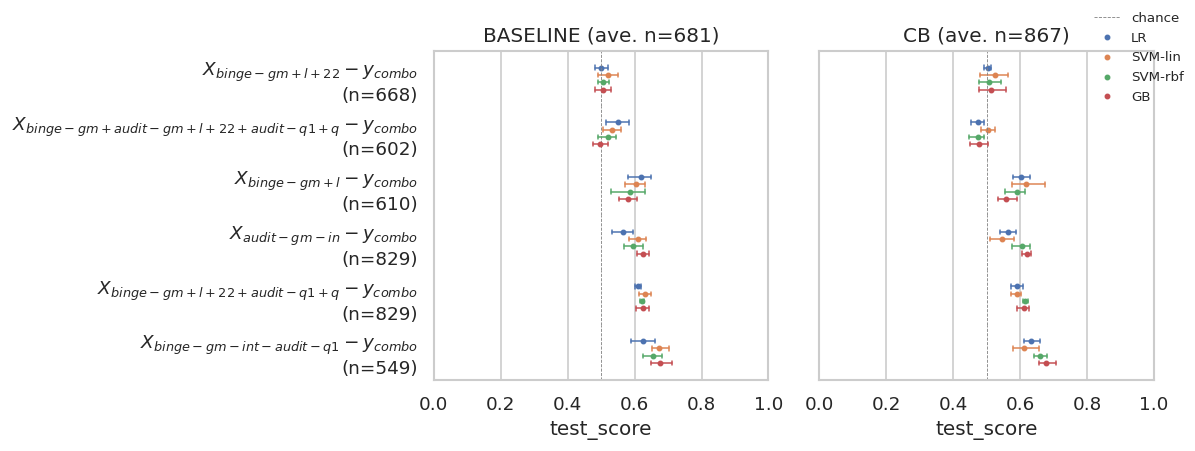

In [52]:
print("Custom combo types:")

dfs=[]
input_types=[]

for fil in ["binge-gm*l*610", "binge-gm*l*22*668", "binge-gm*l*22*audit-q1*q*829", 
            "binge-gm*audit-gm*l*22*audit-q1*q*602", "binge-gm-int-audit-q1*549", "audit-gm-in*829"]:
    f = glob(f"results/combo-combos*-{fil}*/*/run.csv")
#     print(f)
    df = pd.read_csv(f[0])
    # determine the input type for folder name
    input_type = "+".join(fil.split("*")[:-1])
    
    dfs.extend([df])
    input_types.extend([input_type])
    

plot_result(dfs, input_type=input_types, 
            x="test_score", no_confs=True, conf_ctrl=["baseline", "cb"],
            sorty_by='test_score', join=False)
plt.show()

#### 1.5 Other metrics

In [ ]:
df = pd.read_csv(sorted(glob(f"results/gm-combos-espad*gm-fine-2*/*/run.csv"))[-1])  #audit-combos*audit-c*22
plot_result(df, x="specificity", no_confs=False, input_type='sMRI (22yrs)')
plt.show()
plot_result(df, x="sensitivity", no_confs=False, input_type='sMRI (22yrs)')
plt.show()

In [ ]:
# fMRI different labels
dfs = []
input_types = []
tp_map = {"bl":"14yr", "fu1":"16yr", "fu2":"19yr", "fu3":"22yr"}
typ = "fMRI"
for f in glob("results/rsfmri*/*/run.csv"):
#     print(f)
    dfs.extend([pd.read_csv(f)])
    # determine the input type for folder name
    _, tp = f.split("/")[-3].replace("-z2","").split("-")[:2]
    input_type = "{} ({})".format(typ, tp_map[tp.lower()])
#     print(f, input_type)
    input_types.extend([input_type])
    
plot_result(dfs, x ='specificity', input_type=input_types, 
            conf_ctrl=["baseline","cb"], no_confs=True, 
            sorty_by='test_score', join=False) #'n_samples', 'test_score'

### 1.5 Over-sampled vs under-sampled CB

In [ ]:
def plot_results_inputs(h5name, date="*", x="test_score", io_type="X-y", conf_ctrl=["baseline", "cb"]):
    
    fig, axes = plt.subplots(1, len(conf_ctrl), 
                             sharey=False, sharex=True, dpi=200, 
                             figsize=(4*len(conf_ctrl), 4))
    if not isinstance(axes, np.ndarray): axes = [axes]
    y="inputtype"
    plt.gca().set_xlim([0.0,1.0])
    
    for t, ax in zip(conf_ctrl, axes):

        dfs = pd.DataFrame()
        ax.set_title(f"input-output: {io_type}\nconf_ctrl: {t}")
        
        for f in glob(
            f"/ritter/roshan/workspace/deepMRI/imagen/MLpipelines/results/{h5name}*/{date}/run.csv"):
            df = pd.read_csv(f, usecols=["model", "technique", "io", "n_samples", #"trial",
                                         x, 
                                         #"train_score","valid_score", "test_score",
                                         #"roc_auc", "sensitivity", "specificity"
                                        ])
            
            #filter out what 'io' and 'technique' I wanna plot     
            df = df.query("(io =='{}') and (technique == '{}')".format(io_type, t)) 

            # find out what the inputtype was, from the filename
            inputtype, tp = f.split("/")[-3].split("_")[1].replace("-all", "").replace("-z2","").split("-")
            inputtype = "MRI" if "MNInlT1w" in inputtype else inputtype
            df = df.assign(inputtype="{}: {}\n(n={:.0f})".format(tp,inputtype, df["n_samples"].mean()))
            dfs = pd.concat([dfs, df])

        #plot
        dfs = dfs.sort_values([y, "model"])
        ax = sns.pointplot(y=y, x=x, hue="model", join=False, data=dfs, 
                           errwidth=0.85, ci=95,
                           dodge=0.4, scale=0.3, palette=sns.color_palette(), ax=ax)
        ax.legend_.remove()
        ax.set_xlabel(x)
        ax.set_ylabel("")
        
        # draw the chance line
        ax.axvline(x=0.5, label="chance", c='k', ls='--', lw=0.5)

    # add legend: add models info and chance label
    handles, legends = ax.get_legend_handles_labels()
#     legends_rename = {"LogisticRegression":"LR", "LinearSVC":"SVM", "SVC":"SVM-kernel", "GradientBoostingClassifier":"GB"}
#     legends = [legends[0]] + [legends_rename[l] for l in legends[1:]]
    fig.legend(handles, legends, fontsize=8, frameon=False, loc="upper right") 

    fig.tight_layout()

In [ ]:
plot_results_inputs("ESPAD19b", date="20210309-*", x="test_score", io_type="X-y", conf_ctrl=["baseline", "cb", "wdcb"])
plt.suptitle("sub-sampling:")
plt.show()

plot_results_inputs("ESPAD19b", date="20210310-*", x="test_score", io_type="X-y", conf_ctrl=["baseline", "cb", "wdcb"])
plt.suptitle("sub/over-sampling:")
plt.show()

plot_results_inputs("ESPAD19b", date="20210311-*", x="test_score", io_type="X-y", conf_ctrl=["baseline", "cb", "wdcb"])
plt.suptitle("over-sampling:")
plt.show()

In [ ]:
sns.set_style('darkgrid')

def plot_n_samples(file_tech_type, io_type = "X-y", model=""):
    final_df = pd.DataFrame()

    for path, t, sampling_type in file_tech_type:
        f = glob.glob(path)[0]
        df = pd.read_csv(f, usecols=["model", "technique", "io", "n_samples", "test_score"])
        #filter out what 'io' and 'technique' I wanna plot
        df = df.query("(io=='{}') and (technique=='{}')".format(io_type, t)) 
        if model:
            df = df.query("(model=='{}')".format(model))
        df = df.assign(sampling_type=sampling_type)
        final_df = pd.concat([final_df, df])

    final_vals = final_df.groupby("sampling_type").mean()
    final_stds = final_df.groupby("sampling_type").std()
#     display(final_vals)
    final_vals.sort_values('test_score').plot.bar(
            rot=45, subplots=True, layout=(1,2), figsize=(12,4), yerr=final_stds)


tp = "FU2*"    
file_tech_type = [
#     ("/ritter/roshan/workspace/deepMRI/imagen/MLpipelines/results/*FU3*/20210310-*/run.csv", "wdcb", "sub-sample wd"),
    (f"/ritter/roshan/workspace/deepMRI/imagen/MLpipelines/results/*{tp}/20210309-*/run.csv", "cb", "sub-sample"),
    (f"/ritter/roshan/workspace/deepMRI/imagen/MLpipelines/results/*{tp}/20210310-*/run.csv", "cb", "sub/over-sample"),
    (f"/ritter/roshan/workspace/deepMRI/imagen/MLpipelines/results/*{tp}/20210311-*/run.csv", "cb", "over-sample"),
    (f"/ritter/roshan/workspace/deepMRI/imagen/MLpipelines/results/*{tp}/20210310-*/run.csv", "baseline", "base"),
]
plot_n_samples(file_tech_type)
plt.suptitle("all models average")
plt.show()

m="LogisticRegression"
plot_n_samples(file_tech_type, model=m)
plt.suptitle("model={}".format(m))
plt.show()

m="LinearSVC"
plot_n_samples(file_tech_type, model=m)
plt.suptitle("model={}".format(m))
plt.show()

m="SVC"
plot_n_samples(file_tech_type, model=m)
plt.suptitle("model={}".format(m))
plt.show()

m="GradientBoostingClassifier"
plot_n_samples(file_tech_type, model=m)
plt.suptitle("model={}".format(m))
plt.show()


### What does stratifiedKFold do?

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn import datasets
from sklearn import svm

X, y = datasets.load_diabetes(return_X_y=True)
y = (y>170).astype(int)
#dummy
groups = np.hstack([[ii] * 10 for ii in range(len(X)//8)])[:len(X)]

print("X=",X.shape, "\ny=", y.shape, "with vals", np.unique(y), "\ndummy groups=", groups.shape)

In [ ]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(10)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

In [ ]:
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 25 for ii in range(4)])

In [ ]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=group+(100*y), groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [ ]:
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits, shuffle=False)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

### Permutation test: permute `y_tv` or permute `y_tv + y_test`

In [ ]:
def compare_p_dists(df, df2, x="test_score"):

    grp_order = ["technique", "io", "model"]
    groups = df.groupby(grp_order)
    groups_df2 = df2.groupby(grp_order)    
    n_models = len(df["model"].unique())
    sns.reset_orig()
    n_rows = len(groups)//n_models
    fig, axes = plt.subplots(n_rows, n_models, 
                             sharex=True, sharey=False,
                             figsize=(20, n_models*n_rows))
    axes = np.ravel(axes)
        
    for i, (g, rows) in enumerate(groups):
        
        p_vals = [] 
        rows = rows.filter(like=x)
        true_scores = rows[x]            
        
        permuted_scores = [np.array(eval(r[f'permuted_{x}'])) for _, r in rows.iterrows()]  
        permuted_scores = np.ravel(np.array(permuted_scores))        
        
        rows_df2 = groups_df2.get_group(g).filter(like=x)
        permuted_scores_df2 = [np.array(eval(r[f'permuted_{x}'])) for _, r in rows_df2.iterrows()]  
        permuted_scores_df2 = np.ravel(np.array(permuted_scores_df2))
        
        ax = axes[i]
        ax.set_title("Model={}".format(g[-1]))
        if i%n_models == 0:
            ax.set_ylabel("{} with {}".format(*g[:2]))
        ax.hist(permuted_scores, bins='auto', alpha=0.5, label="permute train labels")
        ax.hist(permuted_scores_df2, bins='auto', alpha=0.5, label="permute train + test")
        for true_score in true_scores:
            ax.axvline(true_score, color='r')
            
        ax.set_xlim(0.,1.)        
        ax.legend()
        
    sns.set(style='whitegrid')

In [ ]:
df = pd.read_csv(glob("results/ESPAD19bcluster-growthcurves-l0u2_fsstats*FU3*/*p1000/run.csv")[0])
df2 = pd.read_csv(glob("results/ESPAD19bcluster-growthcurves-l0u2_fsstats*FU3*/*p1000-alsoPermuteTestLabels/run.csv")[0])
compare_p_dists(df, df2)

In [ ]:
sns.reset_orig()
df = calc_p_values(df)
df2 = calc_p_values(df2)
# only select p_values < 0.1
p_vals_1 = df.loc[df["p_value"]<=0.1, "p_value"]
p_vals_2 = df2.loc[df2["p_value"]<=0.1, "p_value"]
plt.hist(p_vals_1, bins=10, alpha=0.8, label="permute train labels")
plt.hist(p_vals_2, bins=20, alpha=0.6, label="permute train + test")
plt.axvline(0.05, color='r', linestyle='--')
plt.xlim([0,0.1])
plt.legend()
plt.show()

In [ ]:
df3 = pd.read_csv(glob("results/ESPAD19bcluster-growthcurves-l0u2_fsstats*FU3*/*1040/run.csv")[0])

In [ ]:
df_x =  df3.query("(technique == '{}') and (io == '{}') and (model == '{}')".format('cb', 'X-y', 'LinearSVC')) 
# for ps in df_x['permuted_test_score']:
#     display(dict(pd.Series(eval(ps)).value_counts()))
permutation_scores = np.array([np.array(eval(ps)) for ps in df_x['permuted_test_score']]).ravel()
plt.hist(permutation_scores)
plt.xlim(0,1)
plt.show()
pd.Series(permutation_scores).value_counts()

### Viz hyperparameter preferences

In [ ]:
def plot_hyperparams_prefs(df):
    for m, g in df.groupby("model"):

        cols = g.filter(like="model_").filter(like=m).columns
        f, axes = plt.subplots(1,len(cols), figsize=(4*len(cols),3))

        if not isinstance(axes, np.ndarray): axes = [axes]

        for ax, c in zip(axes, cols):
            g[c].value_counts(dropna=False).sort_index().plot.bar(ax=ax,
                title=m+" :"+c.replace(f"model_{m}__", ""))

In [ ]:
df = pd.read_csv("/ritter/roshan/workspace/deepMRI/imagen/MLpipelines/results/ESPAD19bcluster-growthcurves-l0u2_fsstats-all-FU3_n629/20210407-1444/run.csv")
plot_hyperparams_prefs(df)


### Small code snippet for debugging confounds.py

In [ ]:
import h5py
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, get_scorer, make_scorer
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from imblearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder

from confounds import *
from copy import deepcopy
from datetime import datetime

import shap

from matplotlib import pyplot as plt

files = [
#     ("/ritter/share/data/IMAGEN/h5files/ESPAD19bcluster-growthcurves-l0u2_fsstats-all-BL_n879.h5", "all"),
#     ("/ritter/share/data/IMAGEN/h5files/ESPAD19bcluster-growthcurves-l0u2_fsstats-all-FU2_n732.h5", "all"),
    ("/ritter/share/data/IMAGEN/h5files/ESPAD19bcluster-growthcurves-l0u2_fsstats-all-FU3_n629.h5", "all"),
]

pipesgrids = [
    ( # (pipeline, grid) for Logistic Regression classifier
        Pipeline([
            ("varth", VarianceThreshold()), 
            ("scale", StandardScaler()),
            ("model_LR", LogisticRegression(max_iter=1000))
            ]),
        {"model_LR__C" : [1.0, 0.01]}, 
    ),
    ( # (pipeline, grid) for linear SVM classifier
        Pipeline([
            ("varth", VarianceThreshold()),
            ("scale", StandardScaler()),
            ("model_SVM-lin", SVC(kernel="linear", max_iter=10000))
            ]),
        {"model_SVM-lin__C" : [1.0, 0.01]},     
    ),
    ( # (pipeline, grid) for SVM classifier with rbf kernel
        Pipeline([
            ("varth", VarianceThreshold()),
            ("scale", StandardScaler()),
            ("model_SVM-rbf", SVC(kernel="rbf"))
            ]),
        {
            "model_SVM-rbf__C" : [1.0, 0.01],
            "model_SVM-rbf__gamma" : ['scale', 'auto']
        }
    ),
    ( # (pipeline, grid) for GradientBoosting classifier
        Pipeline([
            ("varth", VarianceThreshold()),
            ("scale", StandardScaler()),
            ("model_GB", XGBClassifier(eval_metric='logloss', n_estimators=50, max_depth=6, subsample=1.))
        ]),
        {} # todo dd: tuning hyperparameters is too expensive for GB
    )
]

scorer = make_scorer(balanced_accuracy_score)
cv_cls = StratifiedKFold(5, shuffle=True)
i = 'X'
o = 'y'

for n in [600]: #300, 350, 400, 450, 500, 550, 
    t = datetime.now()
    fig, axes = plt.subplots(1, len(files), sharey=True, sharex=True, figsize=(len(files)*5,4))
    if not isinstance(axes, np.ndarray): axes = [axes]
    fig.suptitle("input: {}   sample size: {}".format(i, n))
    plt.yticks(np.arange(0, 101, step=10))    
    
    for idx,(f, _) in enumerate(files):
        
        with h5py.File(f, 'r') as data:   
            
            data_len = len(data["y"])
            
            if n is not None:
                random_subsample = np.sort(
                    np.random.choice(np.arange(data_len), size=n, replace=False)
                )
            else:
                random_subsample = np.s_[:]
            
            X  = data[i][()].reshape(data_len, -1)[random_subsample] 
            if (i == 'c'):
                X = OneHotEncoder(sparse=False).fit_transform(X)
            
            y = data[o][()][random_subsample]
#             print(X.shape, y.shape)
            group = (data['c'][()]+100*data['s'][()])[random_subsample]     
            
            #train test split 
            trainval_idx, test_idx = train_test_split(range(len(X)), 
                                          test_size=0.25, 
                                          stratify=y, 
                                          shuffle=True)
            X_tv = X[trainval_idx]
            y_tv = y[trainval_idx]
            group_tv = group[trainval_idx]
            X_test = X[test_idx]
            y_test = y[test_idx]
            X_test10 = shap.utils.sample(X_test, 10)
            group_test = group[test_idx]
#             print(X_tv.shape, y_tv.shape, X_test.shape, y_test.shape)
            
            baseline_means, baseline_stds, cb_means, cb_stds = [], [], [], []
            model_names = []

            for pipegrid in (pipesgrids):
                ti = datetime.now()
                pipe, grid = deepcopy(pipegrid)
                model_name = pipe.steps[-1][0].replace("model_", "")
                model_names.extend([model_name])
                gs = GridSearchCV(pipe, grid,
                                  cv = cv_cls.split(X_tv, y_tv), scoring=scorer)  
                gs = gs.fit(X_tv, y_tv) 
                test_score = gs.score(X_test, y_test)
                
                baseline_means.extend([100*test_score])
                baseline_stds.extend([100*(gs.cv_results_["std_test_score"].mean())])

                cb = CounterBalance(oversample=True, debug=False)                
                pipe.steps.insert(0, ("conf_corr_cb", cb))                
                gs = GridSearchCV(pipe, grid, 
                                  cv = cv_cls.split(X_tv, y_tv), scoring=scorer)
                gs = gs.fit(X_tv, y_tv, **{"conf_corr_cb__groups":group_tv})
                test_score = gs.score(X_test, y_test)
                cb_means.extend([100*test_score])
                cb_stds.extend([100*(gs.cv_results_["std_test_score"].mean())])               
                
                
                background = shap.maskers.Independent(X, max_samples=1000)
                explainer = shap.Explainer(gs.best_estimator_.predict, background, output_names=["HC","AUD"])
                shap_values = explainer(X_test10)[...,1]
                shap.plots.bar(shap_values)
                
                print("Time elasped for {}: {}s".format(model_name, str(datetime.now()-ti).split(".")[0]))
                
            ax = axes[idx]
            ax.set_title(f.split("-all-")[1].split(".")[0])
            xn = np.arange(len(model_names))  # the label locations
            width = 0.35
            rects1 = ax.bar(xn - width/2, baseline_means, width, yerr=baseline_stds, label='baseline')
            rects2 = ax.bar(xn + width/2, cb_means, width, yerr=cb_stds, label='after CB')
            ax.set_xticks(xn)
            ax.set_xticklabels(model_names, rotation=45)
            ax.axhline(50, color='k', linestyle='--', label='chance')
    plt.gca().legend()
    plt.show()
    print("Total elasped time: {}s".format(str(datetime.now()-t).split(".")[0]))

### Runtime

In [ ]:
df = pd.read_csv(glob("results/*AUDIT*AUDIT*BINGE*BINGE*/*/run.csv")[-1])
df["runtime"]= df["runtime"]/60
sns.barplot(x="model", y="runtime", hue="io", data=df)
plt.ylabel("in minutes")
plt.show()

### PBCC plots

In [ ]:
def plot_pbcc(df):
    df = df.dropna(subset=["d2_conf"])
    labels = [r"$\Delta D^2_c$", r"$\Delta D^2_{p \cap c}$", r"$\Delta D^2_p$"]
    # calculate residuals
    df = df.assign(Dc = lambda x: x.d2_both - x.d2_pred)
    df = df.assign(Dp = lambda x: x.d2_both - x.d2_conf)
    df = df.assign(Dcp = lambda x: x.d2_both - x.Dc - x.Dp)
    
    # calculate p-values    
    df["permuted_Dp"] = '[]'
    for i, row in df.iterrows():
        df.loc[i, "permuted_Dp"] = str([(d2_both_i - row.d2_conf) for d2_both_i in eval(row.permuted_d2_both)])
    df = calc_p_values(df, x="Dp", viz=True)
#     display(df[["p_value","permuted_Dp"]])
    
    sns.set_style("whitegrid")
    f, axes = plt.subplots(1,4, figsize=(16,3))
    for i, (t, dfi) in enumerate(df[["technique", 'p_value', 'Dc', 'Dcp', 'Dp']].groupby("technique")):
        sum = dfi.mean().sum()    
        # set significance stars
        significance_stars = return_asterisks(dfi.pop("p_value").mean())
        lbl = labels.copy() 
        lbl[-1] += " ({})".format(significance_stars)
        ax = dfi.mean().plot.pie(title="technique={}".format(t), ax=axes[i], normalize=False, 
                            autopct=(lambda x: "{:0.3f}".format((x/100)*sum)), labels=lbl,
                            ylabel="", explode=[0,0.1,0.3], shadow=True, startangle=180)
    plt.suptitle("all models average")
    plt.tight_layout()
    plt.show()
    
    t_filter = 'cb'
    df2 = df.query(f"technique == '{t_filter}'")
    f, axes = plt.subplots(1,4, figsize=(16,3))
    for i, (t, dfi) in enumerate(df2[["model", 'p_value', 'Dc', 'Dcp', 'Dp']].groupby("model")):
        
        # set significance stars
        significance_stars = return_asterisks(dfi.pop("p_value").mean())
        lbl = labels.copy() 
        lbl[-1] += " ({})".format(significance_stars)
        
        sum = dfi.mean().sum()        
        dfi.mean().plot.pie(title="model={}".format(t), ax=axes[i], normalize=False, 
                            autopct=(lambda x: "{:0.3f}".format((x/100)*sum)), labels=lbl,
                            ylabel="", explode=[0,0.1,0.3], shadow=True, startangle=180)
    plt.suptitle(f"model-wise scores when technique = {t_filter}")
    plt.tight_layout()
    plt.show()
#     df = df.melt(id_vars=["technique", "model"], value_vars=['Dc', 'Dcp', 'Dp'], value_name='delta Deviance')

# 
#     sns.barplot(x='delta Deviance', y='technique', hue='variable', data=df)
#     plt.suptitle("all models average")
#     plt.show()
    
#     sns.barplot(x='delta Deviance', y='model', hue='variable', data=df)
#     plt.suptitle("all techniques average")
#     plt.show()

In [ ]:
df = pd.read_csv(glob("results/ESPAD19bcluster-growthcurves-l0u2_fsstats-all-FU3_n629/*pbcc/run.csv")[-1])
plot_pbcc(df)